<a href="https://colab.research.google.com/github/jmtiit/Simulation-Package/blob/main/Keras_FinalVersionV1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
from google.colab import drive
drive.mount('/content/drive') #Mount the Notebook to appropriate folder in your Google Drive

Mounted at /content/drive


In [ ]:
! sudo apt-get install dvipng texlive-latex-extra texlive-fonts-recommended cm-super 

Reading package lists... Done
Building dependency tree       
Reading state information... Done
The following additional packages will be installed:
  cm-super-minimal fonts-droid-fallback fonts-lato fonts-lmodern
  fonts-noto-mono fonts-texgyre ghostscript gsfonts javascript-common
  libcupsfilters1 libcupsimage2 libgs9 libgs9-common libijs-0.35 libjbig2dec0
  libjs-jquery libkpathsea6 libpotrace0 libptexenc1 libruby2.5 libsynctex1
  libtexlua52 libtexluajit2 libzzip-0-13 lmodern pfb2t1c2pfb poppler-data
  preview-latex-style rake ruby ruby-did-you-mean ruby-minitest
  ruby-net-telnet ruby-power-assert ruby-test-unit ruby2.5
  rubygems-integration t1utils tex-common tex-gyre texlive-base
  texlive-binaries texlive-latex-base texlive-latex-recommended
  texlive-pictures texlive-plain-generic tipa
Suggested packages:
  fonts-noto ghostscript-x apache2 | lighttpd | httpd poppler-utils
  fonts-japanese-mincho | fonts-ipafont-mincho fonts-japanese-gothic
  | fonts-ipafont-gothic fonts-arph

In [ ]:
pip install SciencePlots

  Created wheel for SciencePlots: filename=SciencePlots-1.0.7-cp37-none-any.whl size=5460 sha256=f59fd59d9cb5732d86224457d03ef351b3783b10fef243ce86c129c1db02c19e
  Stored in directory: /root/.cache/pip/wheels/65/01/f1/d910b2dd79844adab51de69f6f753cd10af4d0563e9ef19a24
Successfully built SciencePlots


In [ ]:
pip install git+https://github.com/garrettj403/SciencePlots.git

  Cloning https://github.com/garrettj403/SciencePlots.git to /tmp/pip-req-build-8jkws2fn
  Running command git clone -q https://github.com/garrettj403/SciencePlots.git /tmp/pip-req-build-8jkws2fn
  Created wheel for SciencePlots: filename=SciencePlots-1.0.7-cp37-none-any.whl size=6207 sha256=9a06761a599fda2340e3a470480901ae1bff013c12f0751c4a199978cf1a3b24
  Stored in directory: /tmp/pip-ephem-wheel-cache-35v3xlew/wheels/a0/c5/37/68038bc07caab614d628c93ff50a069626913aae5e5ca7600b
Successfully built SciencePlots


In [ ]:
import tensorflow
from tensorflow.keras.datasets import mnist
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.utils import to_categorical
import matplotlib.pyplot as plt
import numpy as np

In [ ]:
plt.style.use(['science','grid','ieee'])
def plot_hist(tSig, tBkg, bin=50):
    plt.hist(tSig, bins=bin, density=True, histtype='step', fill=False, color='dodgerblue')
    plt.hist(tBkg, bins=bin, density=True, histtype='step', fill=False, color='red', alpha=0.9)
    plt.xlabel('Normalized Average Energy (Fraction of Peak Energy)')
    plt.xlim(xmin=0)
    plt.xlim(xmax=1)
    plt.ylabel('Probability of Creation (\%)')
    plt.title('Average Neutron Kinetic Energy Per Event')
    plt.savefig('Test {0}.png'.format(i))
    plt.show()

In [ ]:
sigData = np.loadtxt("/content/drive/MyDrive/Colab Notebooks/10000tau.txt") #Include Correct Path
nSig = sigData.shape[0]
sigTargets = np.ones(nSig)

bkgData = np.loadtxt("/content/drive/MyDrive/Colab Notebooks/10000prot.txt") #Include Correct Path
nBkg = bkgData.shape[0]
bkgTargets = np.zeros(nBkg)

input_shape = sigData.shape[1]
print(f'Feature shape: {input_shape}')

for i in range(input_shape):
    plot_hist(sigData[:,i],bkgData[:,i])
    sigData[:,i] /= np.max(sigData[:,i])
    bkgData[:,i] /= np.max(bkgData[:,i])
    plot_hist(sigData[:,i],bkgData[:,i])

Feature shape: 6


NameError: ignored

In [ ]:
model = Sequential()
model.add(Dense(100, input_shape=(input_shape,), activation='relu'))
model.add(Dense(100, activation='relu'))
model.add(Dense(50, activation='relu'))
model.add(Dense(20, activation='relu'))
model.add(Dense(1, activation='sigmoid'))
model.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_5 (Dense)              (None, 100)               700       
_________________________________________________________________
dense_6 (Dense)              (None, 100)               10100     
_________________________________________________________________
dense_7 (Dense)              (None, 50)                5050      
_________________________________________________________________
dense_8 (Dense)              (None, 20)                1020      
_________________________________________________________________
dense_9 (Dense)              (None, 1)                 21        
Total params: 16,891
Trainable params: 16,891
Non-trainable params: 0
_________________________________________________________________


In [ ]:
X_train = np.concatenate((sigData,bkgData),0)
Y_train = np.concatenate((sigTargets, bkgTargets))
model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])

In [ ]:
model.fit(X_train, Y_train, epochs=20, batch_size=250, verbose=2, validation_split=0.2)

Epoch 1/20
64/64 - 1s - loss: 0.5225 - accuracy: 0.7893 - val_loss: 0.5034 - val_accuracy: 0.8428
Epoch 2/20
64/64 - 0s - loss: 0.3922 - accuracy: 0.8112 - val_loss: 0.4788 - val_accuracy: 0.8593
Epoch 3/20
64/64 - 0s - loss: 0.3798 - accuracy: 0.8125 - val_loss: 0.4395 - val_accuracy: 0.8985
Epoch 4/20
64/64 - 0s - loss: 0.3666 - accuracy: 0.8144 - val_loss: 0.3945 - val_accuracy: 0.9038
Epoch 5/20
64/64 - 0s - loss: 0.3565 - accuracy: 0.8247 - val_loss: 0.4535 - val_accuracy: 0.8388
Epoch 6/20
64/64 - 0s - loss: 0.3494 - accuracy: 0.8319 - val_loss: 0.4141 - val_accuracy: 0.8515
Epoch 7/20
64/64 - 0s - loss: 0.3427 - accuracy: 0.8339 - val_loss: 0.4168 - val_accuracy: 0.8587
Epoch 8/20
64/64 - 0s - loss: 0.3420 - accuracy: 0.8337 - val_loss: 0.4852 - val_accuracy: 0.7850
Epoch 9/20
64/64 - 0s - loss: 0.3381 - accuracy: 0.8383 - val_loss: 0.5216 - val_accuracy: 0.7797
Epoch 10/20
64/64 - 0s - loss: 0.3375 - accuracy: 0.8367 - val_loss: 0.3488 - val_accuracy: 0.8808
Epoch 11/20
64/64 -

In [ ]:
 mdsig_label = model.predict(sigData)
bkg_label = model.predict(bkgData)

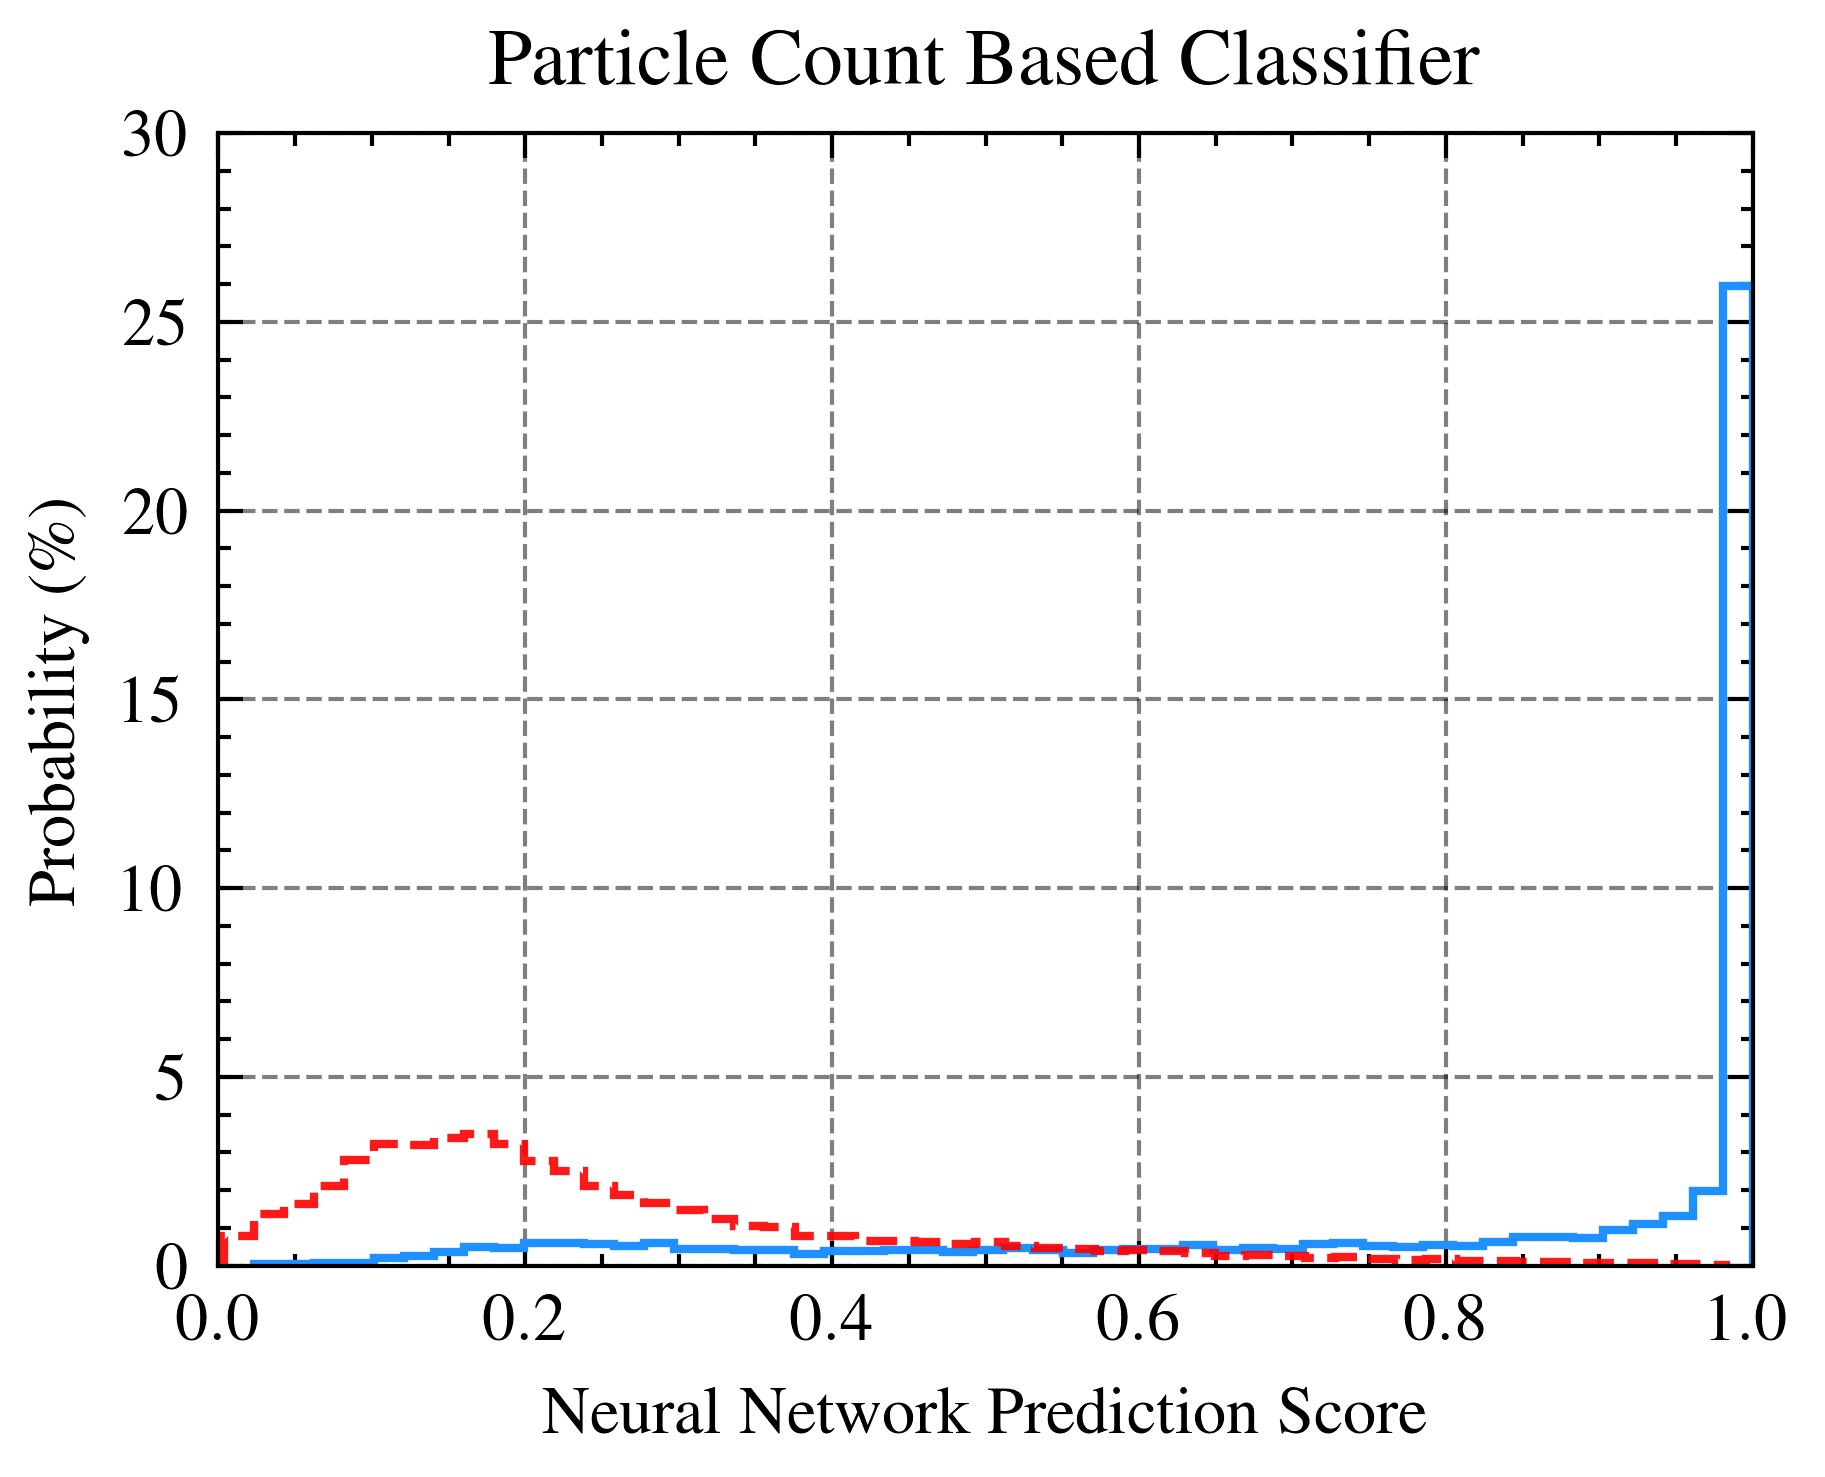

In [ ]:
plt.hist(mdsig_label, bins=50, density=True, histtype='step', fill=False, color='dodgerblue')
plt.hist(bkg_label, bins=50, density=True, histtype='step', fill=False, color='red', alpha=0.9)
plt.xlabel('Neural Network Prediction Score')
plt.xlim(xmin=0)
plt.xlim(xmax=1)
plt.ylim([0, 30])
plt.ylabel('Probability (\%)')
plt.title('Particle Count Based Classifier')
plt.savefig('Test122.png')
plt.show()
